### **Análisis del Transtorno del Sueño**

In [32]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [33]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [34]:
# importe del dataset
df = pd.read_csv(r'Datos/Sleep_health_and_lifestyle_dataset.csv')

##### **Análisis Exploratorio**

In [35]:
# primeras 5 filas
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [36]:
# forma que tiene el dataset
df.shape

(374, 13)

In [37]:
# tipo de valor de cada columna
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [38]:
# descripción general del dataset
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [39]:
# definimos las columnas

columns = [column for column in df.columns if column!='Person ID']

In [40]:
# valores unicos

for column in columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en '{column}': {unique_values}")

Valores únicos en 'Gender': ['Male' 'Female']
Valores únicos en 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Valores únicos en 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Valores únicos en 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Valores únicos en 'Quality of Sleep': [6 4 7 5 8 9]
Valores únicos en 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Valores únicos en 'Stress Level': [6 8 7 4 3 5]
Valores únicos en 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Valores únicos en 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92

In [41]:
# valores nan se toman en cuenta como sin transtorno

df['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [42]:
# cantidad de valores en cada categoria del transtorno

sleep_disorder_counts = df['Sleep Disorder'].value_counts()

print("Value counts of 'Sleep Disorder':")
print(sleep_disorder_counts)

Value counts of 'Sleep Disorder':
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [43]:
# cantidad de valores en cada categoria de IMC

df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
df['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

In [44]:
# conteo de cada categoria por valor de IMC

fig = px.histogram(data_frame=df, x = 'BMI Category', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

In [45]:
# calidad de sueño por categoria
fig = px.histogram(data_frame=df, x = 'Quality of Sleep', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

In [46]:
# ocupación por categoria
fig = px.histogram(data_frame=df, x = 'Occupation', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

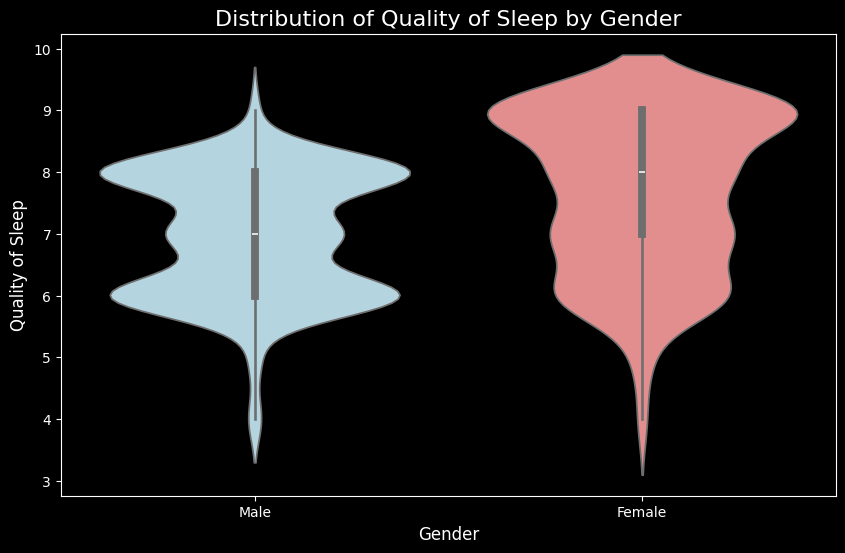

In [47]:
# distribución de la calidad del sueño por categoria
color_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.show()

In [48]:
# relación entre el estrés y la calidad del sueño
fig = px.bar(df, 
             x='Stress Level', 
             y='Quality of Sleep', 
             color='Stress Level',
             title='Relationship between Stress Level and Quality of Sleep'
            )
fig.show()

In [ ]:
# se divide la columna de presión sanguínea y se renombran
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'Systolic', 1: 'Diastolic'})

In [ ]:
# conversión a float
df['Systolic'] = df['Systolic'].astype(float)
df['Diastolic'] = df['Diastolic'].astype(float)

In [ ]:
# lista de las columnas numéricas
numeric_features = ['Age', 'Sleep Duration', 
                    'Physical Activity Level', 
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

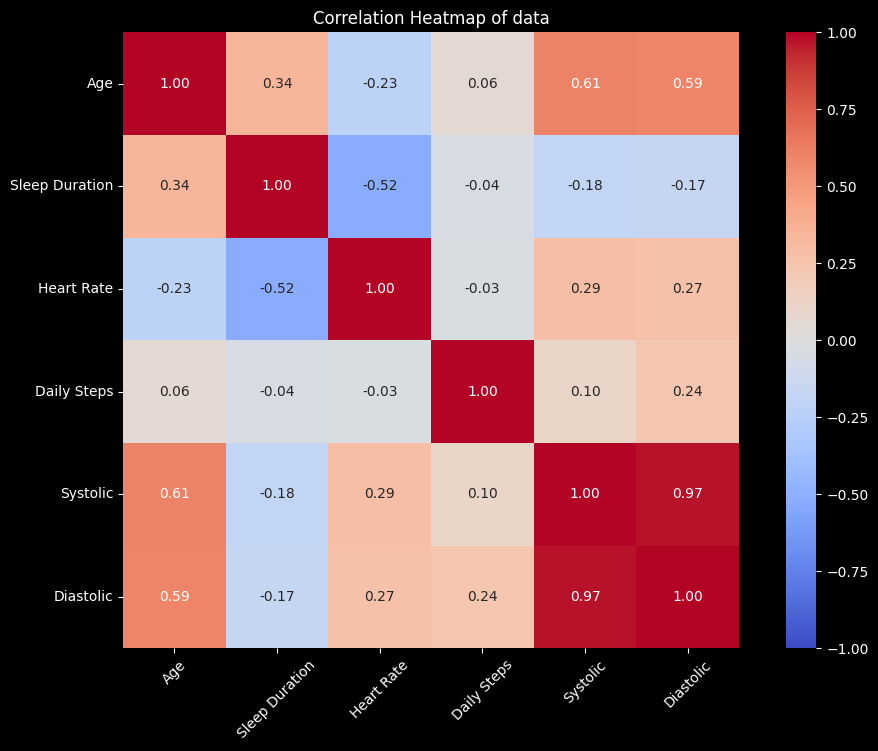

In [67]:
# matriz de correlación de las columnas numéricas
corr_matrix = df[numeric_features].corr()

# figura
plt.figure(figsize=(12, 8))

# heatmap de la matriz
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)

# plot
plt.title('Correlation Heatmap of data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# se borra el Person ID
df.drop(columns=['Person ID'],inplace = True)

In [ ]:
# codificación de las etiquetas
label_encoder = LabelEncoder()
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

In [68]:
# etiquetas
print(label_encoder.classes_)

['Insomnia' 'No Disorder' 'Sleep Apnea']


##### **Preprocesamiento**

In [ ]:
# características numéricas
numeric_features = ['Age', 'Sleep Duration',  
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

# características categóricas
categorical_features = ['Occupation','Quality of Sleep','Gender', 
                    'Physical Activity Level', 'Stress Level', 'BMI Category']

In [ ]:
# transformación de las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',sparse_output =False, handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# división de los datos y las etiquetas
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [ ]:
# fit para el modelado
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# SMOTE crea datos nuevos de manera artificial, para mejorar o equilibrar los datos
smote = SMOTE(random_state=42)

# se aplica el SMOTE a los datos
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)
X_smote.shape

(657, 44)

In [ ]:
# split de los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)  # 75 / 25

##### **Entrenamiento de Modelo**

Accuracy: 0.9090909090909091
Precision: 0.910767756617559
Recall: 0.9090909090909091
F1-score: 0.9084234273263183
              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.88      0.95      0.92        64
           2       0.92      0.92      0.92        63

    accuracy                           0.91       165
   macro avg       0.91      0.90      0.90       165
weighted avg       0.91      0.91      0.91       165



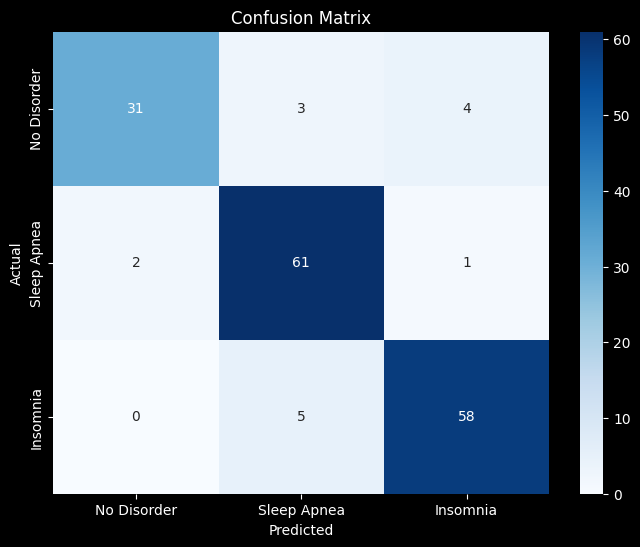

In [ ]:
# modelo de regresion logística
model_lr = LogisticRegression()

# entrenamiento del modelo con los datos
model_lr.fit(X_train, y_train)

# predicción del modelo con el subset de test
y_pred_lr = model_lr.predict(X_test)

# evaluaciones
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# metricas
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1-score: {f1_lr}')

# reporte
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)

# matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Accuracy: 0.9272727272727272
Precision: 0.9287307861220904
Recall: 0.9272727272727272
F1-score: 0.9271254483064495
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.90      0.97      0.93        64
           2       0.97      0.92      0.94        63

    accuracy                           0.93       165
   macro avg       0.93      0.92      0.92       165
weighted avg       0.93      0.93      0.93       165



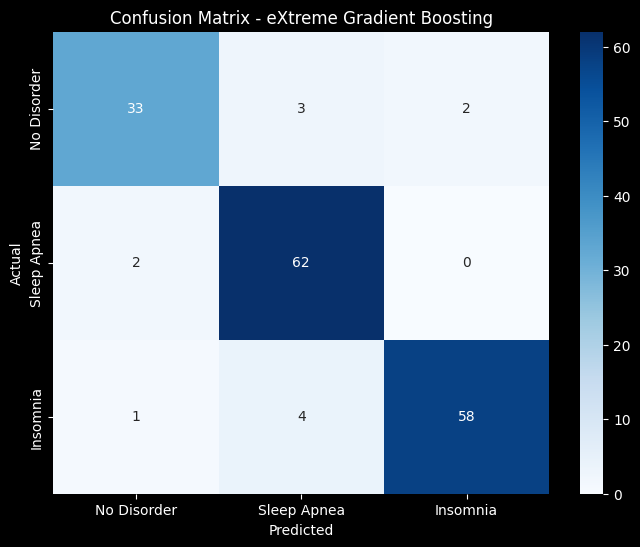

In [77]:
# modelo de clasificación XGBoost
model_xgb = xgb.XGBClassifier()

# entrenamiento del modelo
model_xgb.fit(X_train, y_train)

# predicciones del modelo con el subset de test
y_pred = model_xgb.predict(X_test)

# evaluaciones
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted')
recall_xgb = recall_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, y_pred, average='weighted')

# metricas
print(f'Accuracy: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1-score: {f1_xgb}')

# reporte
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - eXtreme Gradient Boosting')
plt.show()

Accuracy: 0.9151515151515152
Precision: 0.9159698433611476
Recall: 0.9151515151515152
F1 Score: 0.9146926163614225
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.90      0.97      0.93        64
           2       0.95      0.90      0.93        63

    accuracy                           0.92       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.92      0.92      0.91       165



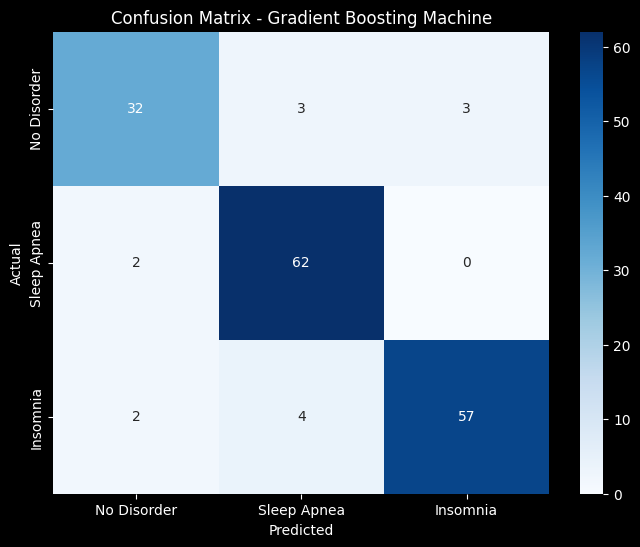

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# modelo de clasificación GBS
gbm_clf = GradientBoostingClassifier(random_state=42)

# entrenamiento del modelo
gbm_clf.fit(X_train, y_train)

# predicciones con el split de test
y_pred = gbm_clf.predict(X_test)

# evaluaciones
accuracy_gbm = accuracy_score(y_test, y_pred)
precision_gbm = precision_score(y_test, y_pred, average='weighted')
recall_gbm = recall_score(y_test, y_pred, average='weighted')
f1_gbm = f1_score(y_test, y_pred, average='weighted')

# metricas
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1 Score: {f1_gbm}")

# reporte
print("Classification Report:")
print(classification_report(y_test, y_pred))

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Machine')
plt.show()

Accuracy: 0.9212121212121213
Precision: 0.9231093544137023
Recall: 0.9212121212121213
F1 Score: 0.9212926845789491
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.88      0.95      0.92        64
           2       0.97      0.92      0.94        63

    accuracy                           0.92       165
   macro avg       0.92      0.91      0.92       165
weighted avg       0.92      0.92      0.92       165



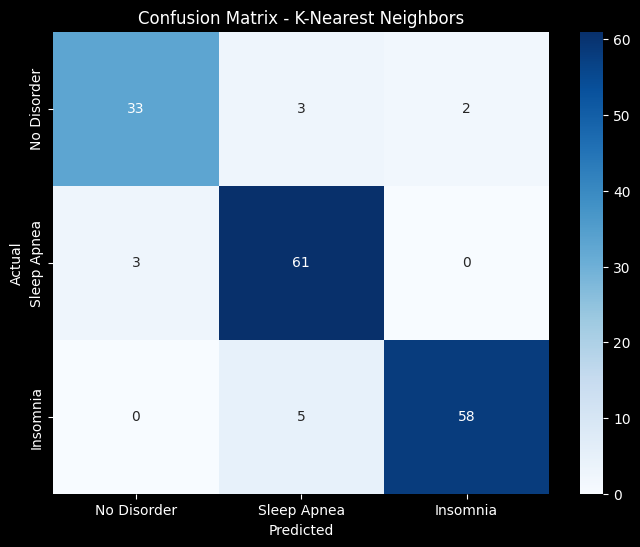

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# modelo de clasificación KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)   # k = 5

# entrenamiento del modelo
knn_clf.fit(X_train, y_train)

# predicciones con el subset para tests
y_pred = knn_clf.predict(X_test)

# evaluaciones
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# metricas
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

# reporte
print("Classification Report:")
print(classification_report(y_test, y_pred))

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

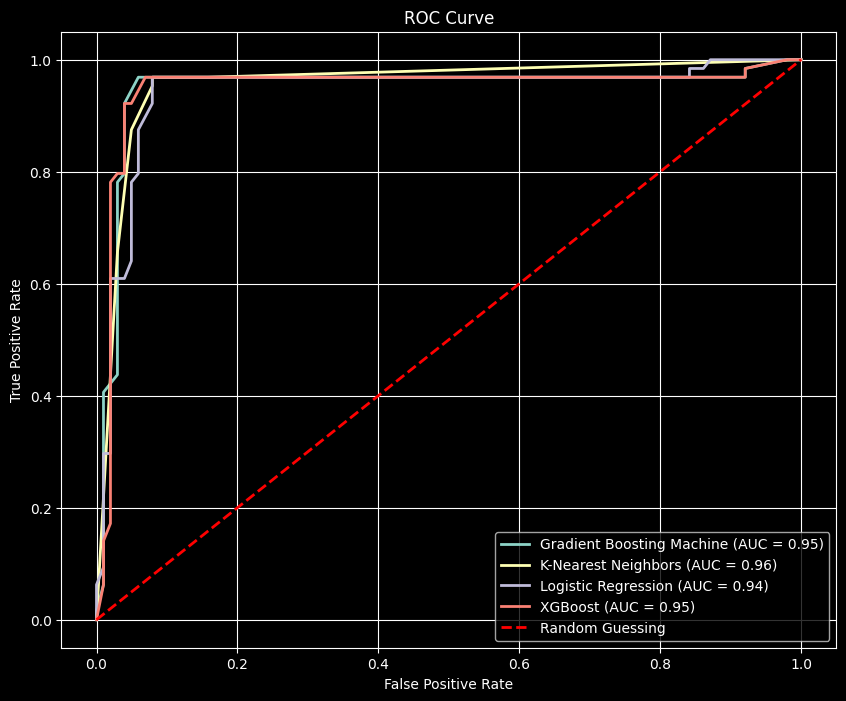

In [79]:
from sklearn.metrics import roc_curve, auc
# la curva ROC es una herramienta que se utiliza para evaluar el rendimiento de un modelo de clasificación

# figura
fig_roc = plt.figure(figsize=(10, 8))
models = ['Gradient Boosting Machine', 'K-Nearest Neighbors', 'Logistic Regression', 'XGBoost']

# grafica de la curva ROC para los modelos utilizados
for idx, model in enumerate([gbm_clf, knn_clf, model_lr, model_xgb]):
    if model == knn_clf:
        y_scores = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)

    roc_auc = auc(fpr, tpr)

    # plot
    plt.plot(fpr, tpr, lw=2, label=f'{models[idx]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing')

# figura
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()